In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069


In [3]:
tips.shape

(244, 8)

In [4]:

n_meses = 3
n_clientes = 210

datas = pd.Series(pd.date_range('1/1/2019', periods = n_meses, freq = 'MS').repeat(n_clientes))

dados = tips.sample(n = n_meses * n_clientes, replace=True).reset_index()

tips2 = pd.concat([datas, dados], axis = 1)
tips2.rename({0:'data_ref'}, inplace = True, axis = 'columns')
tips2

,data_ref,index,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,2019-01-01,110,14.00,3.00,Male,No,Sat,Dinner,2,0.272727
1,2019-01-01,33,20.69,2.45,Female,No,Sat,Dinner,4,0.134320
2,2019-01-01,178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.714286
3,2019-01-01,172,7.25,5.15,Male,Yes,Sun,Dinner,2,2.452381
4,2019-01-01,40,16.04,2.24,Male,No,Sat,Dinner,3,0.162319
...,...,...,...,...,...,...,...,...,...,...
625,2019-03-01,182,45.35,3.50,Male,Yes,Sun,Dinner,3,0.083632
626,2019-03-01,77,27.20,4.00,Male,No,Thur,Lunch,4,0.172414
627,2019-03-01,202,13.00,2.00,Female,Yes,Thur,Lunch,2,0.181818
628,2019-03-01,45,18.29,3.00,Male,No,Sun,Dinner,2,0.196207


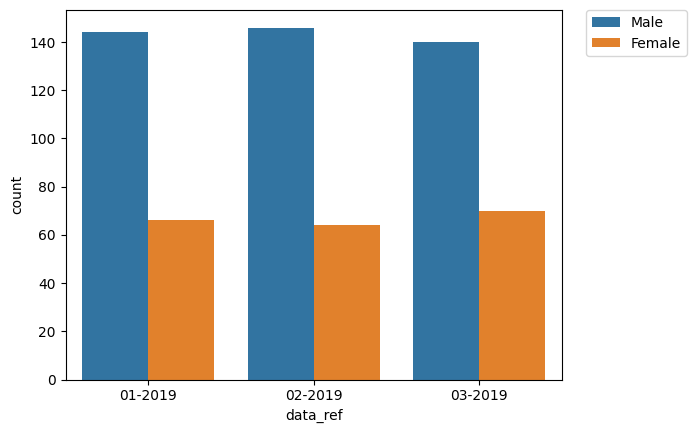

In [5]:

ax = sns.countplot(x='data_ref',  hue = 'sex', data=tips2)

tick_labs = tips2['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

# tick_labs.tolist()

ticks = ax.set_xticks(list(range(tips2['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=0)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [6]:
tab = pd.crosstab(tips2['data_ref'],tips2['sex'])
tab.div(tab.sum(axis = 1), axis = 0)

sex,Male,Female
data_ref,,
2019-01-01,0.685714,0.314286
2019-02-01,0.695238,0.304762
2019-03-01,0.666667,0.333333


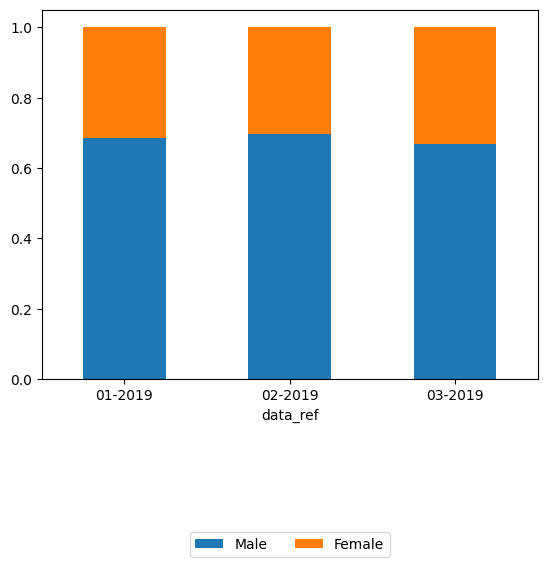

In [7]:
tab_freq = pd.crosstab(tips2['data_ref'],tips2['sex'])
tab = tab_freq.div(tab.sum(axis = 1), axis = 0)

ax = tab.plot.bar(stacked = True)

tick_labs = tips2['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(tips2['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=0)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)